In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')

# Overview
print(df.info())
print(df.describe())

# Missing values
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

# Drop columns with >99% missing
high_missing_cols = missing_percent[missing_percent > 99].index.tolist()
print("Columns with more than 99% missing values:", high_missing_cols)
df = df.drop(columns=high_missing_cols)



C:\Users\hlina\AppData\Local\Temp\ipykernel_25864\539778867.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [3]:
# Avoid division by zero
df = df[df["TotalPremium"] > 0]
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]


In [4]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors='coerce')


In [5]:
print(df.groupby("Province")["LossRatio"].mean().sort_values())
print(df.groupby("VehicleType")["LossRatio"].mean())
print(df.groupby("Gender")["LossRatio"].mean())



Province
Free State       0.106209
Northern Cape    0.203831
Eastern Cape     0.235636
KwaZulu-Natal    0.265328
North West       0.285348
Western Cape     0.341810
Limpopo          0.348712
Mpumalanga       0.392698
Gauteng          0.428927
Name: LossRatio, dtype: float64
VehicleType
Bus                  0.000000
Heavy Commercial     0.793617
Light Commercial     0.543917
Medium Commercial    0.493386
Passenger Vehicle    0.337534
Name: LossRatio, dtype: float64
Gender
Female           0.491979
Male             0.353258
Not specified    0.347932
Name: LossRatio, dtype: float64


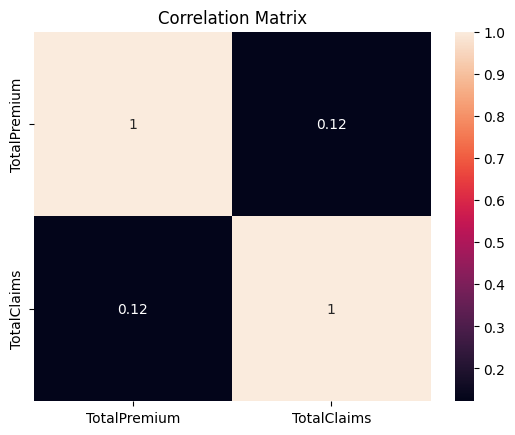

In [6]:
corr = df[["TotalPremium", "TotalClaims"]].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()


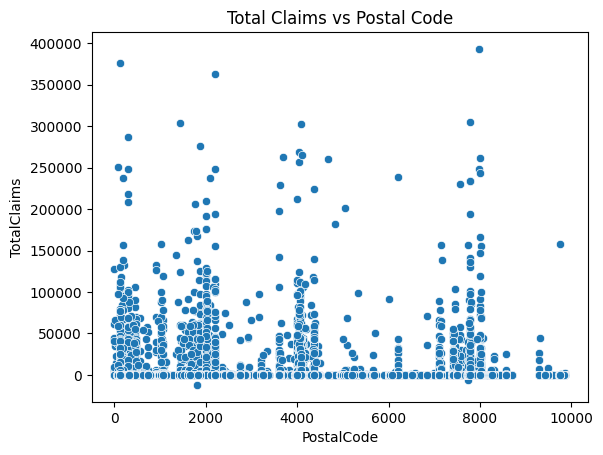

In [7]:
sns.scatterplot(data=df, x="PostalCode", y="TotalClaims")
plt.title("Total Claims vs Postal Code")
plt.show()


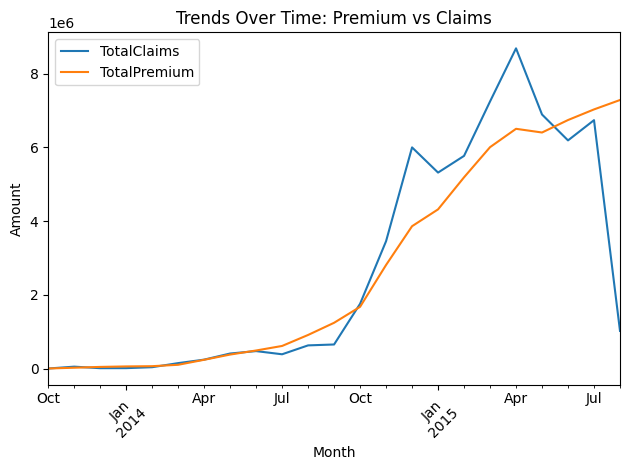

In [8]:
monthly = df.groupby(df["TransactionMonth"].dt.to_period("M")).sum(numeric_only=True)
monthly[["TotalClaims", "TotalPremium"]].plot()
plt.title("Trends Over Time: Premium vs Claims")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
top_claims = df.groupby(["make", "Model"])["TotalClaims"].mean().sort_values(ascending=False).head(10)
low_claims = df.groupby(["make", "Model"])["TotalClaims"].mean().sort_values().head(10)

print("Top 10 Claiming Vehicles:\n", top_claims)
print("\nLowest 10 Claiming Vehicles:\n", low_claims)


Top 10 Claiming Vehicles:
 make                                 Model                      
HYUNDAI                              H-1 2.5 CRDI WAGON A/T         6177.271564
TOYOTA                               L/CRUISER FJ 4.0 V6 CRUISER    5340.970273
                                     VERSO 180 SX                   5222.270335
BMW                                  320d (E90)                     1253.318881
FIAT                                 DUCATO 2.3 JTD VETRATO         1014.681021
SUZUKI                               ERTIGA 1.4 GA                   993.628225
MERCEDES-BENZ                        C180 BE COUPE                   893.975272
MAZDA                                3 2.0 INDIVIDUAL                860.246711
VOLKSWAGEN                           POLO VIVO 1.6 5Dr               827.558882
AUDI                                 A4 1.8T S AVANT MULTITRONIC     803.591711
Name: TotalClaims, dtype: float64

Lowest 10 Claiming Vehicles:
 make        Model                         


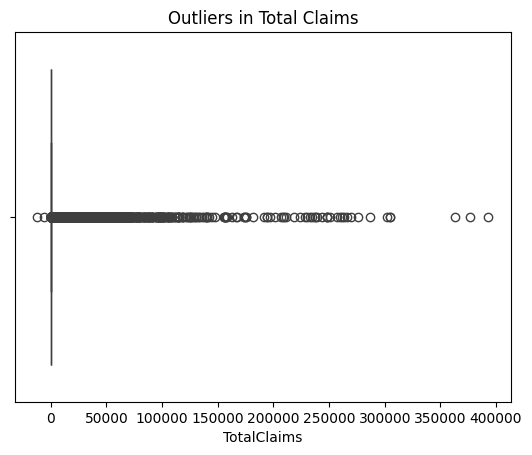

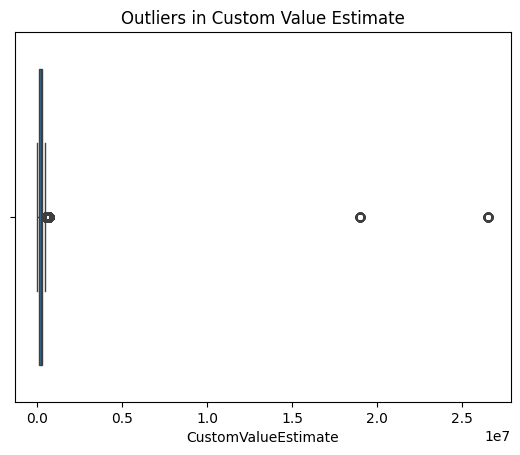

In [10]:
# Total Claims
sns.boxplot(x=df["TotalClaims"])
plt.title("Outliers in Total Claims")
plt.show()

# Custom Value Estimate
sns.boxplot(x=df["CustomValueEstimate"])
plt.title("Outliers in Custom Value Estimate")
plt.show()


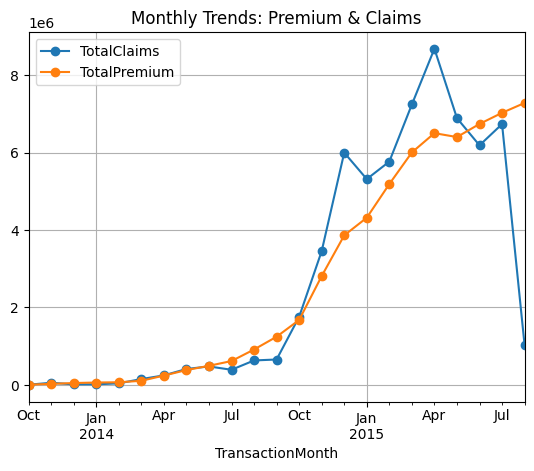

In [11]:
monthly[["TotalClaims", "TotalPremium"]].plot(marker='o')
plt.title("Monthly Trends: Premium & Claims")
plt.grid(True)
plt.show()


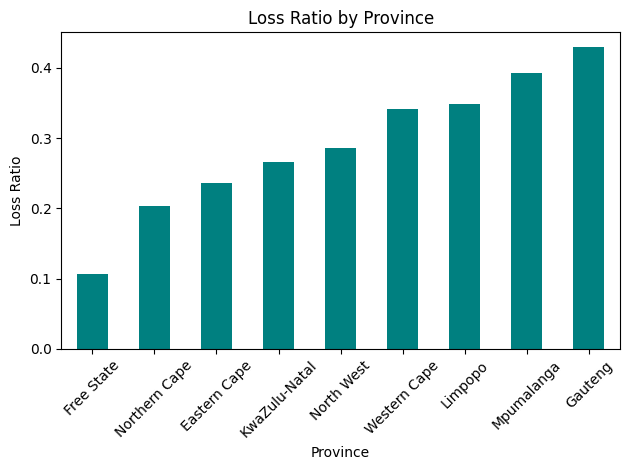

In [12]:
province_loss = df.groupby("Province")["LossRatio"].mean().sort_values()
province_loss.plot(kind='bar', color='teal')
plt.title("Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


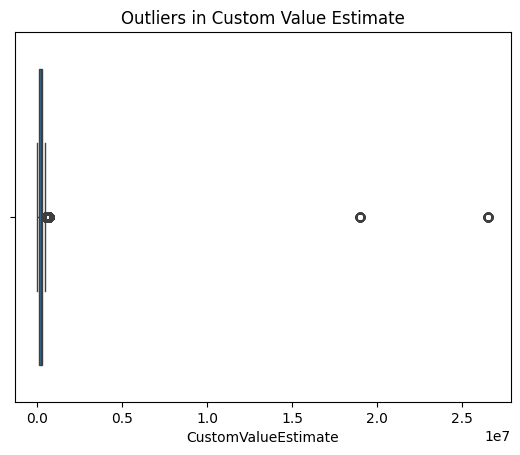

In [13]:
sns.boxplot(x=df["CustomValueEstimate"])
plt.title("Outliers in Custom Value Estimate")
plt.show()
